In [1]:
from doc import plot_utils
plot_utils.setup()

In [2]:
import pandas as pd

penguins = pd.read_csv("/home/peguerosdc/development/thesis/doc/penguins.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

# fix
df = penguins[penguins["Species"]!="Chinstrap"].copy()
df["x1"] = df["Culmen Depth (mm)"]
df["x0"] = df["Culmen Length (mm)"]
df["Type"] = df["Species"].apply(lambda x : "Signal" if x=="Adelie" else "Background")
df = df.drop(columns=["Culmen Length (mm)", "Culmen Depth (mm)", "Species"])
culmen_columns = ["x0", "x1"]
target_column = "Type"
penguins=df

In [3]:
df.loc[df["Type"]=="Signal","x0"] = df[df["Type"]=="Signal"]["x0"] - 2

In [4]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = data, data, target, target
range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns}

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")

    return ax

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=2)

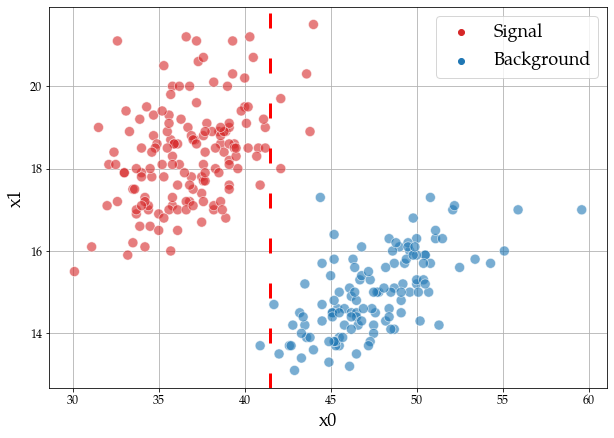

In [19]:
import seaborn as sns
palette = ["tab:red", "tab:blue"]

fix, ax = plot_utils.get_1x1_im_figure()

sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette, s=10**2, ax=ax, alpha=0.6)
#plot_decision_function(tree, range_features, ax=ax)
plt.legend()
plt.axvline(x=41.45, color="red", linestyle=(0, (5, 10)), lw=3)
#plt.axhline(y=17.65, xmin=0.395, linestyle='dotted')

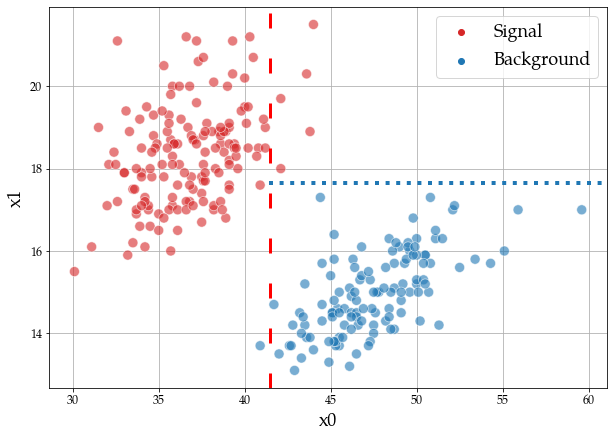

In [21]:
import seaborn as sns
palette = ["tab:red", "tab:blue"]

fix, ax = plot_utils.get_1x1_im_figure()

sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette, ax=ax, s=10**2,alpha=0.6)
#plot_decision_function(tree, range_features, ax=ax)
plt.legend()
plt.axvline(x=41.45, color="red", linestyle=(0, (5, 10)), lw=3)
plt.axhline(y=17.65, xmin=0.395, linestyle='dotted', lw=4)

[Text(167.4, 181.2, 'X[0] <= 41.45\ngini = 0.495\nsamples = 274\nvalue = [123, 151]'),
 Text(83.7, 108.72, 'X[1] <= 14.6\ngini = 0.014\nsamples = 147\nvalue = [1, 146]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 146\nvalue = [0, 146]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 17.65\ngini = 0.076\nsamples = 127\nvalue = [122, 5]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 122\nvalue = [122, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

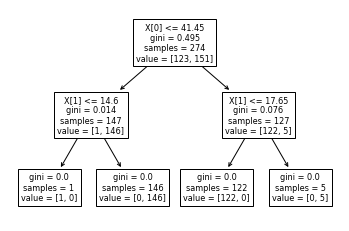

In [53]:
import sklearn
sklearn.tree.plot_tree(tree)